In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

sys.path.append("/home/dimi/Programming/MachineLearningUFABC/Projeto_KNN/python/")
from MetricasClass import Metricas

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

In [3]:
def corAleatoria():
    
    arrayRGB = list(np.random.choice(range(100), size=3))
    cor      = "#" + str(arrayRGB[0]) + str(arrayRGB[1]) + str(arrayRGB[2])
    
    while len(cor) < 7:
        cor += "0"
    
    return cor

In [4]:
def plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTemposDimi, mediaTemposSK, desvPadTemposDimi, desvPadTemposSK):
    
    fig, ax1 = plt.subplots()

    ax1.errorbar(valoresK, mediaPrecisoesMedias, yerr=desvPadPrecisoesMedias, fmt=".--", linewidth=1, elinewidth=1, capsize=2, label="Precisão Média", color="#9467bd")
    ax1.errorbar(valoresK, mediaRevocacoesMedias, yerr=desvPadRevocacoesMedias, fmt=".--", linewidth=1, elinewidth=1, capsize=2, label="Revocação Média", color="#d62728")
    ax1.errorbar(valoresK, mediaAcuracias, yerr=desvPadAcuracias, fmt=".--", linewidth=1, elinewidth=1, capsize=2, label="Acurácia", color="#1f77b4")
    ax1.set_xlabel("Valor de K")
    ax1.set_ylabel("Métricas")

    ax2 = ax1.twinx()

    ax2.errorbar(valoresK, mediaTemposDimi, yerr=desvPadTemposDimi, fmt=".--", linewidth=1, elinewidth=1, capsize=2, label="Tempo Algoritmo Próprio", color="#ff7f0e")
    ax2.errorbar(valoresK, mediaTemposSK, yerr=desvPadTemposSK, fmt=".--", linewidth=1, elinewidth=1, capsize=2, label="Tempo Scikit Learn", color="#2ca02c")
    ax2.set_ylabel("Tempo de Processamento (s)")
    

    plt.title("Resultados para o " + nomeDataset)
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper left')
    plt.xticks(valoresK)
    ax1.grid(alpha=0.25)
    plt.tight_layout()
    
    caminhoSalvarPDF = "../resultados/imagens/resultado_" + nomeDataset.replace(" ", "") + ".pfd"
    plt.savefig(caminhoSalvarPDF, format='pdf', bbox_inches = 'tight')
    plt.show()

In [5]:
def obterMetricas(caminho):
    # ABRINDO OS RESULTADOS DO DATASET
    arquivo = open(caminho, "r")
    arrayMatrizesConfusaoDimi = eval(arquivo.readline().replace("\n", "").replace("array", "np.array"))
    arrayMatrizesConfusaoSK   = eval(arquivo.readline().replace("\n", "").replace("array", "np.array"))
    arrayTemposDimi           = eval(arquivo.readline().replace("\n", "").replace("array", "np.array"))
    arrayTemposSK             = eval(arquivo.readline().replace("\n", "").replace("array", "np.array"))
    
    # RANGE DE K'S
    valoresK = np.arange(1, len(arrayMatrizesConfusaoDimi)*2, 2)

    # CRIANDO OS ARRAYS QUE VAO GUARDAR AS METRICAS PARA CADA VALOR DE K
    mediaAcuracias          = []
    mediaPrecisoesMedias    = []
    mediaRevocacoesMedias   = []
    desvPadAcuracias        = []
    desvPadPrecisoesMedias  = [] 
    desvPadRevocacoesMedias = []
    mediaTempoDimi          = []
    mediaTempoSK            = []
    desvPadTempoDimi        = []
    desvPadTempoSK          = []

    # PARA CADA VALOR DE K
    for iteracaoK, matrizesKAtual in enumerate(arrayMatrizesConfusaoDimi):

        # VOU GUARDAR AS METRICAS DOS HOLDOUTS
        acuraciasKAtual        = []
        precisoesMediasKAtual  = []
        revocacoesMediasKAtual = []

        # E OS TEMPOS JA POSSO PEGAR TUDO DO K ATUAL
        mediaTempoDimi.append(np.mean(arrayTemposDimi[iteracaoK]))
        mediaTempoSK.append(np.mean(arrayTemposSK[iteracaoK]))
        desvPadTempoDimi.append(np.std(arrayTemposDimi[iteracaoK]))
        desvPadTempoSK.append(np.std(arrayTemposSK[iteracaoK]))

        # PARA CADA HOLDOUT
        for matrizConfusaoAtual in matrizesKAtual:        

            # CALCULO TODAS AS METRICAS E COLOCO NOS ARRAYS DO K ATUAL
            objMetricas = Metricas(matrizConfusaoAtual)
            acuraciasKAtual.append(objMetricas.acuracia)
            precisoesMediasKAtual.append(objMetricas.mediaPrecisoes)
            revocacoesMediasKAtual.append(objMetricas.mediaRevocacoes)

        # AGORA QUE JA TENHO OS RESULTADOS DO K ATUAL, VOU PREENCHER UMA NOVA LINHA DOS ARRAYS GERAIS
        mediaAcuracias.append(np.mean(acuraciasKAtual))
        mediaPrecisoesMedias.append(np.mean(precisoesMediasKAtual))
        mediaRevocacoesMedias.append(np.mean(revocacoesMediasKAtual))
        desvPadAcuracias.append(np.std(acuraciasKAtual))
        desvPadPrecisoesMedias.append(np.std(precisoesMediasKAtual))
        desvPadRevocacoesMedias.append(np.std(revocacoesMediasKAtual))
    
    return valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK

## Parte 1

### Dataset 1

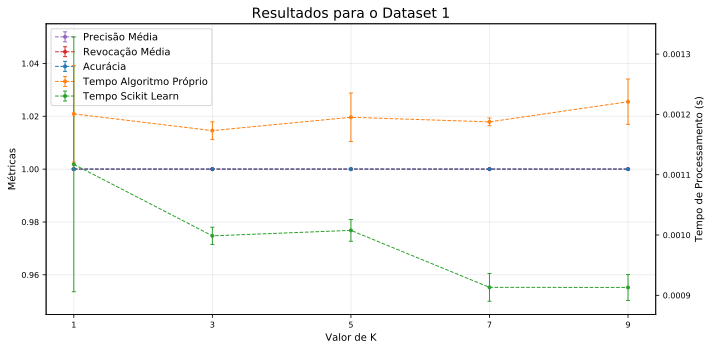

In [6]:
nomeDataset = "Dataset 1"
caminho     = "../resultados/dumps/dataset1.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 2

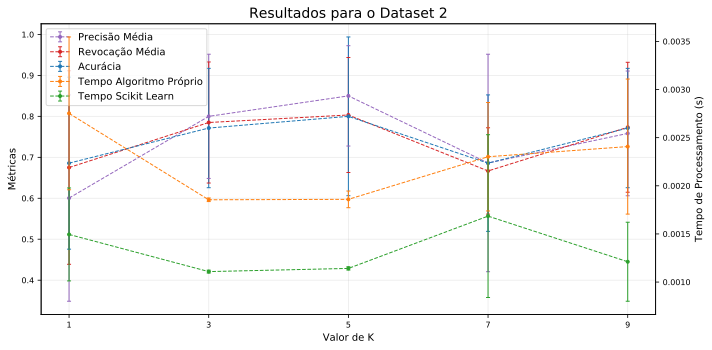

In [7]:
nomeDataset = "Dataset 2"
caminho     = "../resultados/dumps/dataset2.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 3

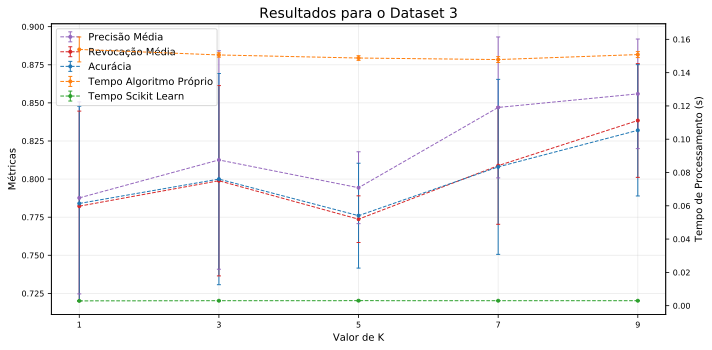

In [8]:
nomeDataset = "Dataset 3"
caminho     = "../resultados/dumps/dataset3.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 4

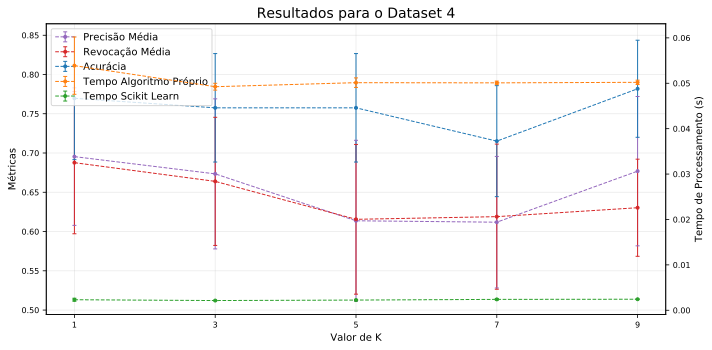

In [9]:
nomeDataset = "Dataset 4"
caminho     = "../resultados/dumps/dataset4.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 5

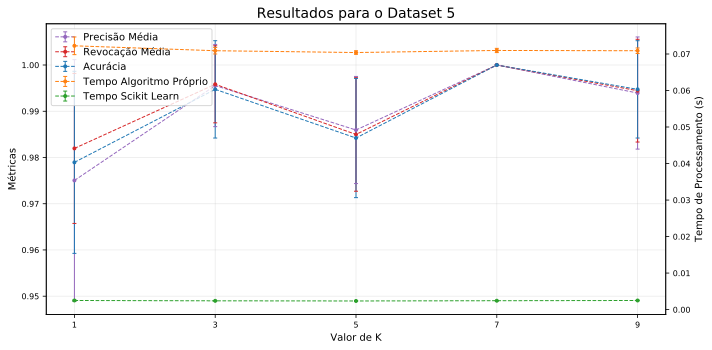

In [10]:
nomeDataset = "Dataset 5"
caminho     = "../resultados/dumps/dataset5.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 6

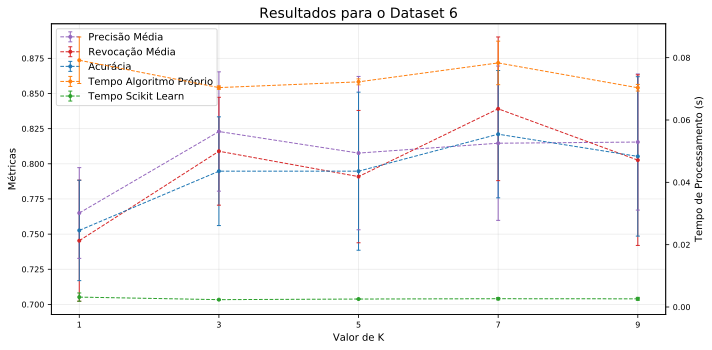

In [11]:
nomeDataset = "Dataset 6"
caminho     = "../resultados/dumps/dataset6.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

## Parte 2

### Dataset 1

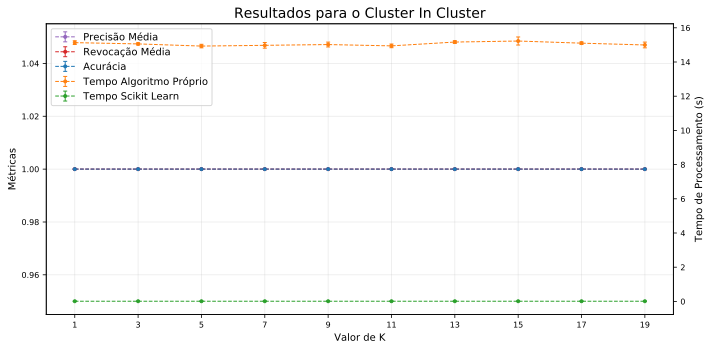

In [18]:
nomeDataset = "Cluster In Cluster"
caminho     = "../resultados/dumps/dataset1b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 2

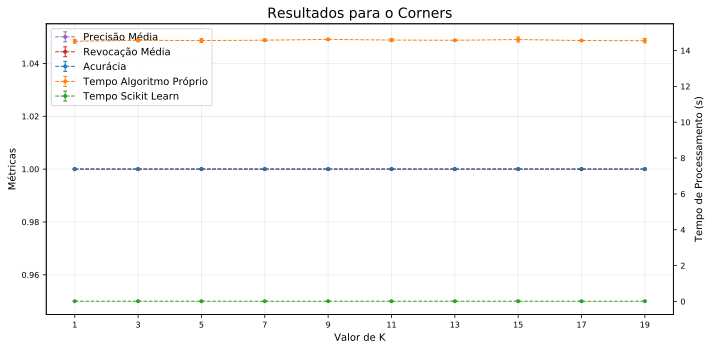

In [19]:
nomeDataset = "Corners"
caminho     = "../resultados/dumps/dataset2b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 3

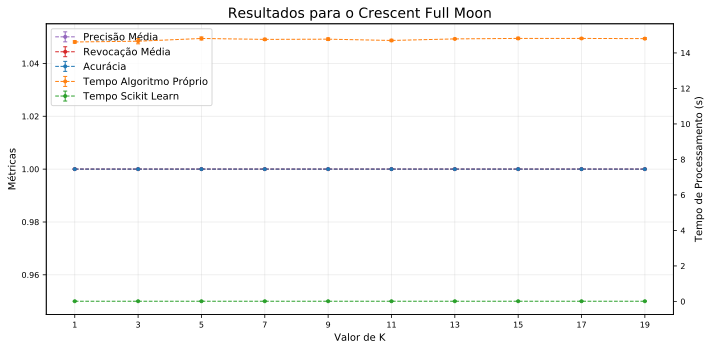

In [20]:
nomeDataset = "Crescent Full Moon"
caminho     = "../resultados/dumps/dataset3b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 4

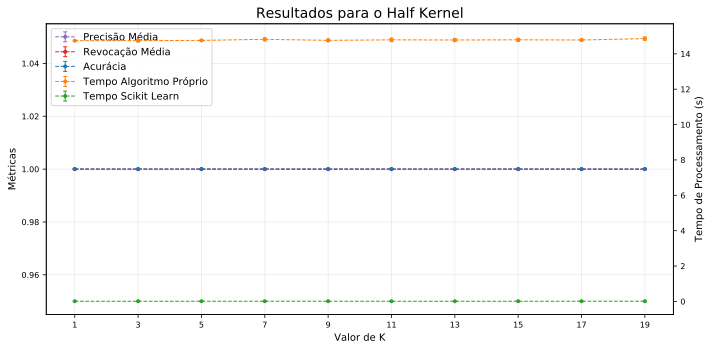

In [21]:
nomeDataset = "Half Kernel"
caminho     = "../resultados/dumps/dataset4b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 5

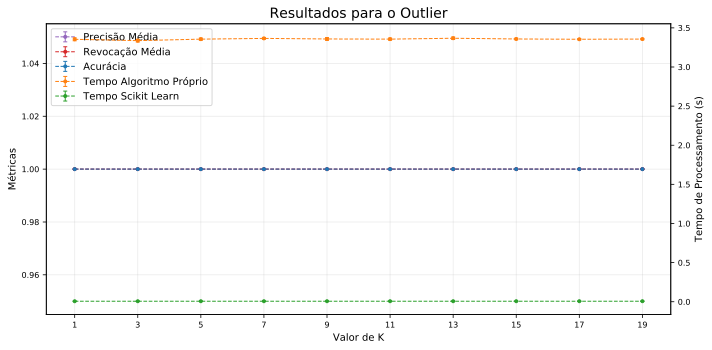

In [22]:
nomeDataset = "Outlier"
caminho     = "../resultados/dumps/dataset5b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)

### Dataset 6

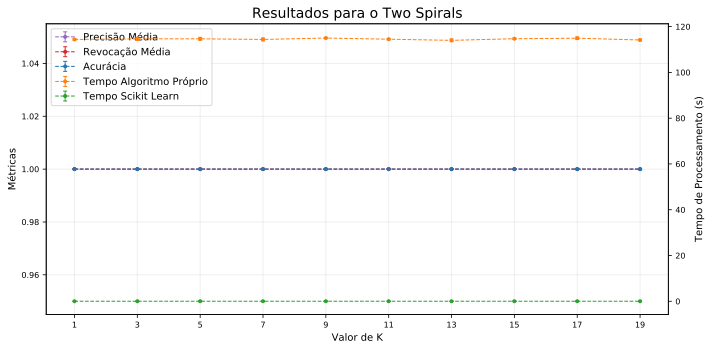

In [23]:
nomeDataset = "Two Spirals"
caminho     = "../resultados/dumps/dataset6b.txt"

valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK = obterMetricas(caminho)
plotar(nomeDataset, valoresK, mediaAcuracias, mediaPrecisoesMedias, mediaRevocacoesMedias, desvPadAcuracias, desvPadPrecisoesMedias, desvPadRevocacoesMedias, mediaTempoDimi, mediaTempoSK, desvPadTempoDimi, desvPadTempoSK)